**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Saksham Rai
- James Zheng
- Boden Haber
- Nathan Keodara
- Arnav Ghai

# Research Question

Does the operational investment of major US airline companies, as measured by their average expenses per available seat mile have a relationship with the frequency and duration of flight delays at the airports they service?



## Background and Prior Work

When traveling, flight delays can be problematic for both travelers and the airline. For the traveler, they risk wasting time stuck in an airport or potentially missing out on time-sensitive events on arrival. For the airlines, delays can cascade into interfering with other flight landings, full day delays, and losing customers.<a name="cite_ref-3"></a>[<sup>1</sup>](#cite_note-3) As a result, understanding the nature of delays would be immensely valuable for planning by travelers and airlines.

There are many previous works looking for patterns in flight delays. For example, Mitsokapas, et. al. 's research paper attempts to create a statistical model for the probability of a flight being delayed by increasing amounts of time.<a name="cite_ref-3"></a>[<sup>1</sup>](#cite_note-3) While the overall model does not provide any new insights, the authors found that airlines tend to produce the most similar delay distributions within itself. YY’s article, on the other hand, presents a possible predictive model for flight delays. They find that flight departure time is one of the most predictive features for delays.<a name="cite_ref-4"></a>[<sup>2</sup>](#cite_note-4)

Because the variable of departure time is often inflexible for travelers, investigating why companies develop unique delay patterns may have more practical implications. However, the precise process and logistics of airline companies that lead to delays is unavailable to the public, meaning a different representation for airline logistics is needed. One interpretation of the delay of an airplane is that it is a measure of its quality. For example, if a company tries to make flights as cheap as possible (through paying workers less, lower quality equipment, etc.), then their flight could be considered lower quality and expected to have higher delays on average.

As a result, we want to use the financials of an airline company as an indicator for the quality of their flights and test if it has a relationship to their average delays on arrival.



1. <a name='cite_note-3'></a> [^](#cite_ref-3) Mitsokapas, E., Schäfer, B., Harris, R.J. et al. \“Statistical characterization of airplane delays.\” Sci Rep 11, 7855 (2021). https://doi.org/10.1038/s41598-021-87279-8
2. <a name='cite_note-4'></a> [^](#cite_ref-4) YY (6 May 2020). “Predicting Flight Delays Through Modeling U.S. Flight Data.” Medium. https://medium.com/analytics-vidhya/modeling-flight-delays-through-u-s-flight-data-2f0b3d7e2c89



# Hypothesis


In contrast to general intuition, we hypothesize that airlines with higher profit margins may experience more delays and cancellations. This hypothesis stems from the idea that while these airlines are financially successful, their focus might be more on maximizing profits and less on operational efficiency. For instance, in pursuit of higher revenues, these airlines might operate with tighter schedules or overbook flights, leading to increased delays.

Additionally, high profits do not automatically translate to operational investments for enhancing customer satisfaction; these airlines might allocate their profits towards other areas like shareholder dividends or expanding routes, rather than improving training or maintenance. Therefore, despite their financial success, these airlines could face more operational challenges, including delays and cancellations, due to their strategic choices.

# Data

## Data overview

## Data overview

- Dataset #1
  - Dataset Name: Dataset Name: Airline On-Time Statistics and Delay Causes - Bureau of Transportation Statistics
  - Link to the dataset: https://www.transtats.bts.gov/ot_delay/OT_DelayCause1.asp?20=E
  - Number of observations: 133,196,476
  - Number of variables: 11 (Airline, Airport, Date period, On Time, Air carrier delay, Weather delay, National aviation system delay, Security Delay, Aircraft arriving late, Canceled, Diverted)
- Dataset #2 
  - Dataset Name: Airline Data Project - MIT Global Airline Industry Program
  - Link to the dataset: https://www.kaggle.com/datasets/xan3011/airline-data-project-mit-1995-2019
  - Number of observations: 24
  - Number of variables: 227

Dataset #1 is a collection of flight on-time and delay statistics for major US airports and airlines. The information is collected by the Bureau of Transportation Statistics and has data ranging from June 2003 to August 2023, for a total of 133,196,476 flights. The important variables we are looking for are airline, airport, number of delays, and delay time. The metrics we are looking for are delay rate vs on-time rate per airline and airport route, as well as the amount of time delayed. Our data type is mostly numerical. Our proxies are as follows: on-time arrival rate as a proxy for airline efficiency and operational performance. The dataset when imported in has 200,000 observations, with each corresponding to a specific airline servicing a specific airport at a specific month and year. There are 21 features, but as mentioned before, we are most interested in the features of airline, airport, number of delays, and the amount of delay for each sample.

Dataset #2 is a collection of several financial variables (such as Available Seat Miles, Passenger Revenue per Available Seat Mile, and Revenue Passenger Miles) for the most popular 16 airlines as well as the total industry from 1995-2018. The important variables we specifically are looking for are the ones that indicate operational investment for each major US airline company, as measured by their average expenses and revenue per available seat mile. The dataset we are most interested in would be for the Total System Expenses per Available Seat Mile (TSEASM), which is a scaling of each airline's expenses for the amount of passenger and amount of miles flown. Some proxies we may use are as follows: TSEASM: A proxy for operational investment for each airline. A higher TSEASM indicates that an airline is spending more on its operations, such as fuel, labor, and maintenance. Our dataset has each observation as the airline and each column as the TSEASM for that years. When we transform this dataset, we will have 200 samples of company expenses for a given year.

The two datasets could be combined to gain a more comprehensive understanding of the factors that contribute to flight delays for each airline. For example, by combining data on flight delays with data on flight expenses, it may be possible to identify correlations between operational investment/costs and delay rates. We are also looking to analyze the relationship between on-time arrival rates and TSEASM for different airlines. This combination of data can be done by grouping the MIT Dataset by their airline and year and then summing the interested values (delay time, delay rate) giving 200 samples to pair with the expenses.


## Airline On-Time Statistics and Delay Causes - Bureau of Transportation Statistics

In this section, we import the BTS dataset in. It is separated into CSVs for each of the different 16 airlines we are interested in. As a result, we simply need to combine the separate dataframes into one larger dataframe for future modifications. This dataframe will contain samples for a specific airline servicing a specific airport on a specific month and year. The features contain number of arriving flights, amount of delay time, and number of delayed flights.

In [3]:
import pandas as pd

northwest = pd.read_csv('NorthWestAirline_2003_2023_delay.csv')
usairways = pd.read_csv('USAirways_2003_2023_delay.csv')
united = pd.read_csv('UnitedAirlines_2003_2023_delay.csv')
american = pd.read_csv('americanairlines_2003_2023_delay.csv')
continental = pd.read_csv('continentalairline_2003_2023_delay.csv')
delta = pd.read_csv('deltaiarlines_2003_2023_delay.csv')

airtran = pd.read_csv('AirTranAirways_2003_2023_delay.csv')
alaskan = pd.read_csv('AlaskaAirlines_2003_2023_delay.csv')
allegiant = pd.read_csv('AllegiantAirlines_2003_2023_delay.csv')
frontier = pd.read_csv('FrontierAirlines_2003_2023_delay.csv')
hawaiian = pd.read_csv('HawaiianAirline_2003_2023_delay.csv')
jetblue = pd.read_csv('JetBlueAirways_2003_2023_delay.csv')
southwest = pd.read_csv('Southwest_2003_2023_delay.csv')
spirit = pd.read_csv('SpiritAirlines_2003_2023_delay.csv')
virgin = pd.read_csv('VirginAirlines_2003_2023_delay.csv')

In [4]:
# Combining all separate CSV's into one large dataframe

total_airlines = pd.concat([northwest, usairways, united, american, continental, delta, airtran,
                           alaskan, allegiant, frontier, hawaiian, jetblue, southwest, spirit, virgin])
print(total_airlines.shape)

(182559, 21)


In [5]:
total_airlines = total_airlines.reset_index()
total_airlines.head(5)

,index,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,0,2009,12,NW,Northwest Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",55.0,8.0,2.39,...,0.00,1.14,0.0,0.0,288.0,138.0,12.0,101.0,0.0,37.0
1,1,2009,12,NW,Northwest Airlines Inc.,ALB,"Albany, NY: Albany International",30.0,6.0,3.86,...,0.00,0.00,0.0,0.0,317.0,158.0,109.0,50.0,0.0,0.0
2,2,2009,12,NW,Northwest Airlines Inc.,ANC,"Anchorage, AK: Ted Stevens Anchorage Internati...",46.0,12.0,6.01,...,0.00,2.21,0.0,1.0,662.0,360.0,71.0,148.0,0.0,83.0
3,3,2009,12,NW,Northwest Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",31.0,10.0,2.23,...,0.18,5.65,0.0,0.0,351.0,93.0,0.0,48.0,7.0,203.0
4,4,2009,12,NW,Northwest Airlines Inc.,BDL,"Hartford, CT: Bradley International",128.0,26.0,16.82,...,0.00,1.36,1.0,0.0,1045.0,649.0,21.0,330.0,0.0,45.0


One thing to check for is the presence of potential null values. When running code that examines every containing a null value, we find a particular edge case. For certain airports, where there are no delayed flights, the 'arr_del15' column, which indicates the amount of flights delayed more than 15 minutes, will also be NaN. As a result, a different dropping method will be used to prevent these cases from being dropped.

In [6]:
rows_to_drop = total_airlines[total_airlines.isnull().any(axis=1)]
rows_to_drop[-10:-1]

,index,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
178611,2178,2020,4,NK,Spirit Air Lines,BQN,"Aguadilla, PR: Rafael Hernandez",1.0,NaN,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178618,2185,2020,4,NK,Spirit Air Lines,CRW,"Charleston/Dunbar, WV: Yeager",3.0,NaN,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178622,2189,2020,4,NK,Spirit Air Lines,EWR,"Newark, NJ: Newark Liberty International",106.0,NaN,0.0,...,0.0,0.0,106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178625,2192,2020,4,NK,Spirit Air Lines,IAG,"Niagara Falls, NY: Niagara Falls International",9.0,NaN,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178632,2199,2020,4,NK,Spirit Air Lines,LGA,"New York, NY: LaGuardia",77.0,NaN,0.0,...,0.0,0.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178640,2207,2020,4,NK,Spirit Air Lines,PBG,"Plattsburgh, NY: Plattsburgh International",7.0,NaN,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178641,2208,2020,4,NK,Spirit Air Lines,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",18.0,NaN,0.0,...,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181400,269,2017,5,VX,Virgin America,SLC,"Salt Lake City, UT: Salt Lake City International",1.0,NaN,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
181506,375,2016,12,VX,Virgin America,ONT,"Ontario, CA: Ontario International",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
airline_cleaned = total_airlines.dropna(subset=[col for col in total_airlines.columns if col != 'arr_del15'])
airline_cleaned.shape


(182420, 22)

## Airline Data Project - MIT Global Airline Industry Program

Table 1 utlizes this dataset's 'System Total Expenses adjusted for Available Seat Miles' variable.

In each case, the original dataset was formatted as an embedded Excel sheet. To clean the data, all the valuable data was copied onto a new sheet, formatted properly, and saved as a CSV. For the revenue dataframe, the last column can be simply dropped. Moreover, the profit can be calculated by substracting each expense data point from the revenue datapoint.

In [75]:
expenses = pd.read_csv('System Total Expenses Per ASM.csv')
expenses.head()

,Unnamed: 0,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,American,8.43,7.83,8.07,8.27,8.28,8.95,10.25,9.76,8.99,...,9.25,9.21,9.80,9.34,8.94,9.32,9.48,9.87,10.48,10.75
1,Continental,7.24,7.77,7.71,8.00,8.17,8.16,8.38,8.41,7.86,...,7.97,8.35,8.18,-,-,-,-,-,-,-
2,Delta,7.56,8.03,7.68,7.89,7.93,7.98,8.51,8.58,9.12,...,7.78,8.06,8.31,8.83,9.07,9.49,9.73,10.01,10.43,10.21
3,Northwest,7.83,7.70,7.60,8.49,7.96,8.14,8.76,9.03,8.82,...,8.69,-,-,-,-,-,-,-,-,-
4,United,7.59,7.82,8.08,8.04,8.16,8.68,9.86,9.37,8.36,...,7.89,8.41,8.99,9.03,9.29,9.33,9.37,9.87,9.93,10.08


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Section 1: Normality of Flight Delays

Here, if we want to use regression to determine if expenses causes delay, we need to verify if both are normally distributed.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<Axes: xlabel='arr_delay', ylabel='Count'>

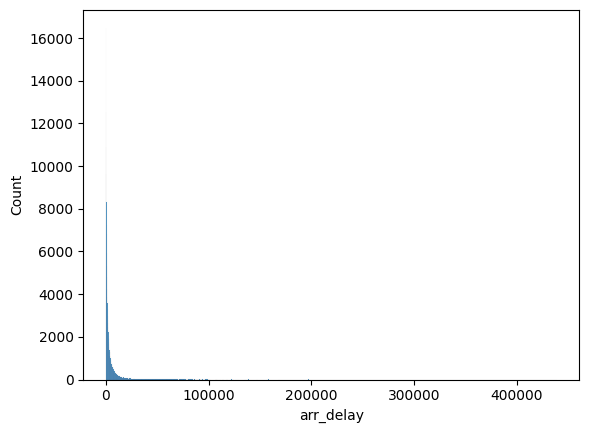

In [10]:
sns.histplot(x='arr_delay', data=airline_cleaned)

As shown above, our delay time data is heavily skewed to the left. One possible explanation is that it should be typical for there to be little to no delay. After all, the expectation should be that our flight would not be delayed. This would be especially so as each sample is separated by airline, month, year, and the airport they service. To remedy this skew, we can try first summing the delays of each airline across all of the airports and months they serviced. We do this assuming that the lower end values will disappear as they are summed with higher end values.

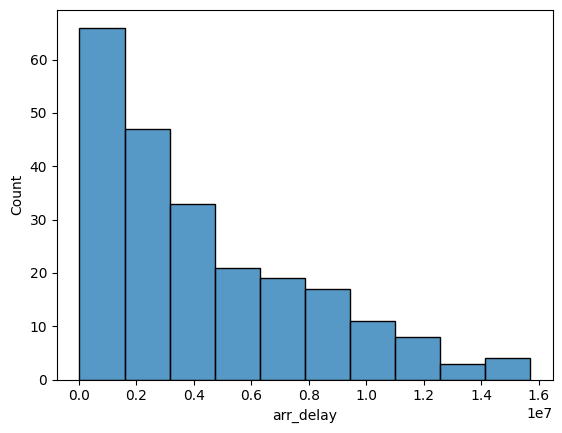

In [11]:
delay = airline_cleaned[['airport','carrier','year','month','arr_delay']]
yearly_sums = delay.groupby(by=['carrier','year'])['arr_delay'].sum()
yearly_sums = pd.DataFrame(yearly_sums)
yearly_sum_plot = sns.histplot(data=yearly_sums,x='arr_delay')

Despite summing the delays, it seems a non-insignificant portion of delays still fall below 10000, while there are many months where airlines are delayed by nearly 10x as much. Looking into the original dataset, one briefly notices that higher arr_delay value seem to have higher number of arrival flights. To test this, we can make a scatterplot comparison between the number of arrival flights and arr_delay for each.

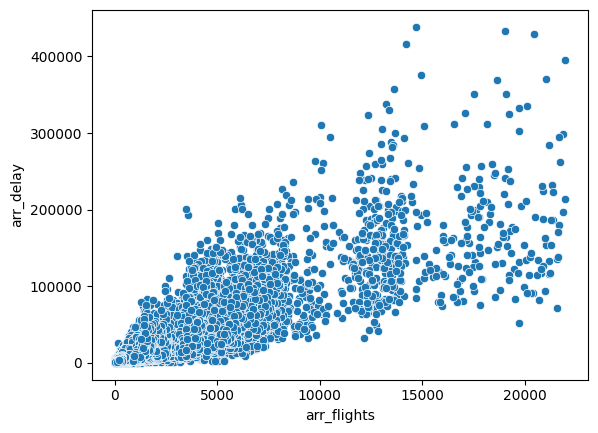

In [12]:
num_flights_and_delays = sns.scatterplot(data=total_airlines,x='arr_flights',y='arr_delay')

While the spread in the scatterplot is incredibly large, there does seem to some increasing trend between the amount of delay a carrier has at an airport and the amount of flights coming in, which makes sense. We will now scale all of the delay values by dividing it by the number of flights coming in.

In [13]:
delay_scaled = airline_cleaned[['airport','carrier','year','month','arr_delay','arr_flights']]
delay_scaled['scaled_delay'] = delay_scaled.loc[:,'arr_delay'] / delay_scaled.loc[:,'arr_flights']
delay_scaled.head()

/var/folders/_l/cy_q4k853b33lbpxc_gtvy_h0000gn/T/ipykernel_14194/4056521244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_scaled['scaled_delay'] = delay_scaled.loc[:,'arr_delay'] / delay_scaled.loc[:,'arr_flights']


,airport,carrier,year,month,arr_delay,arr_flights,scaled_delay
0,ABQ,NW,2009,12,288.0,55.0,5.236364
1,ALB,NW,2009,12,317.0,30.0,10.566667
2,ANC,NW,2009,12,662.0,46.0,14.391304
3,ATL,NW,2009,12,351.0,31.0,11.322581
4,BDL,NW,2009,12,1045.0,128.0,8.164062


(0.0, 300.0, 0.0, 4000.0)

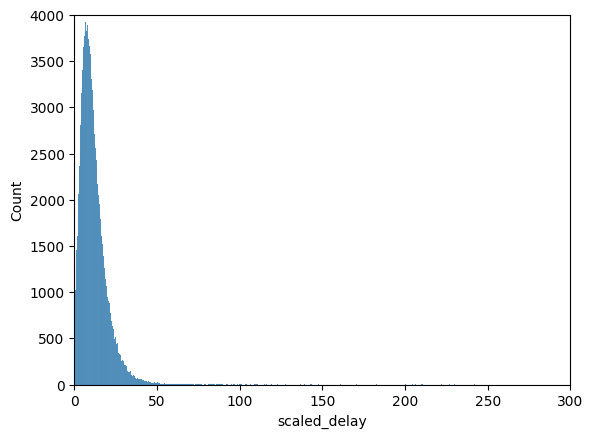

In [14]:
sns.histplot(data=delay_scaled,x='scaled_delay')
plt.axis([0, 300, 0, 4000])

In [15]:
delay_scaled['log_delay'] = np.log10(delay_scaled['scaled_delay']+0.1)
delay_scaled.head()

/var/folders/_l/cy_q4k853b33lbpxc_gtvy_h0000gn/T/ipykernel_14194/2164322494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_scaled['log_delay'] = np.log10(delay_scaled['scaled_delay']+0.1)


,airport,carrier,year,month,arr_delay,arr_flights,scaled_delay,log_delay
0,ABQ,NW,2009,12,288.0,55.0,5.236364,0.727245
1,ALB,NW,2009,12,317.0,30.0,10.566667,1.028029
2,ANC,NW,2009,12,662.0,46.0,14.391304,1.161107
3,ATL,NW,2009,12,351.0,31.0,11.322581,1.057764
4,BDL,NW,2009,12,1045.0,128.0,8.164062,0.917194


The total delay data has shifted from looking like an exponential decay to looking more normal but still radically skewed right. This was observed in the scatterplot by the large amount of points. Looking deeper, this result also makes sense because delay data by default is skewed right, as it cannot have a negative value. As a result, it is like looking at half of a normal distribution. To fix this, applying a log10 + 0.1 transformation could work now that the scaled data more closely resembles a bell curve.

(0.0, 5.0, 0.0, 4000.0)

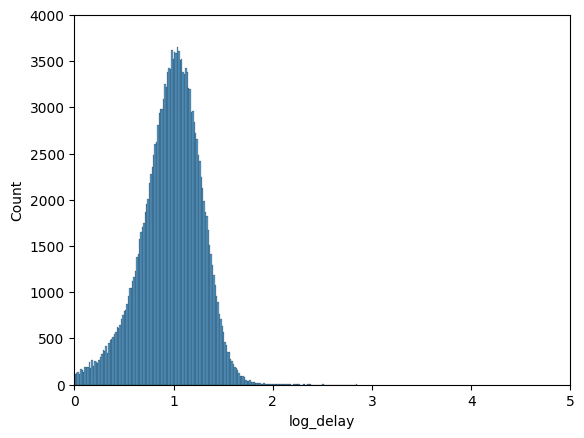

In [16]:
sns.histplot(data=delay_scaled,x='log_delay')
plt.axis([0, 5, 0, 4000])

The log transformation has given us a normal distribution when applied on the total delay time of an airline at an airport for a given month and for a given year. However, the expenses data is given yearly for each of the different airlines. To ensure we can combine these two datasets, we need to sum up the delays across every airport and every month of year for a given airline and apply this same log transformation.

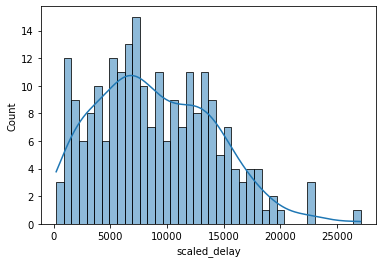

In [76]:
yearly_scaled_sums = delay_scaled.groupby(by=['carrier','year'])['scaled_delay'].sum()
yearly_scaled_sums = pd.DataFrame(yearly_scaled_sums)
scaled_delay_sums_plot = sns.histplot(data=yearly_scaled_sums,x='scaled_delay',kde=True,bins=40)

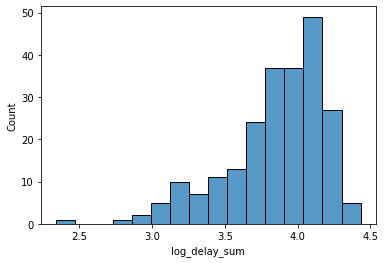

In [77]:
yearly_scaled_sums['log_delay_sum'] = np.log10(yearly_scaled_sums['scaled_delay'])
log_delay_sum_plot = sns.histplot(data=yearly_scaled_sums,x='log_delay_sum')

In the two above plots, we actually see that when we sum up the scaled data across each airport and month for each airline and year, the data is weakly skewed right. When we apply a log transformation to the sum of the scaled, it becomes skewed left. 

This can be remedied below. By first summing up the total amount of flights and total amount of delay and then dividing these sums, the new distribution for each airline's yearly total scaled delay is approximately normal. The former approach is likely biased by the lower volume airports. The latter approach likely removes the airport's bias by summing first.

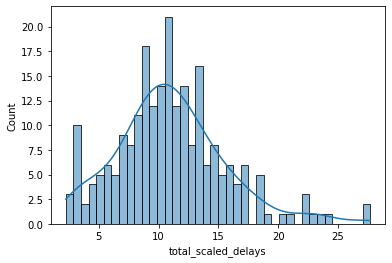

In [78]:
a = delay_scaled.groupby(by=['carrier','year'])[['arr_delay','arr_flights']].sum()
a = pd.DataFrame(a)
a['total_scaled_delays'] = a['arr_delay'] / a['arr_flights']

total_scaled_delay_plot = sns.histplot(data=a,x='total_scaled_delays',kde=True,bins=40)

### Distribution and Outlier Analysis of Airline Financials

We first ensure that our financial data is normally distributed to perform a linear regression. Next, we check for possible outliers and patterns in the finances overtime to explain possible defects in later stages of analysis.

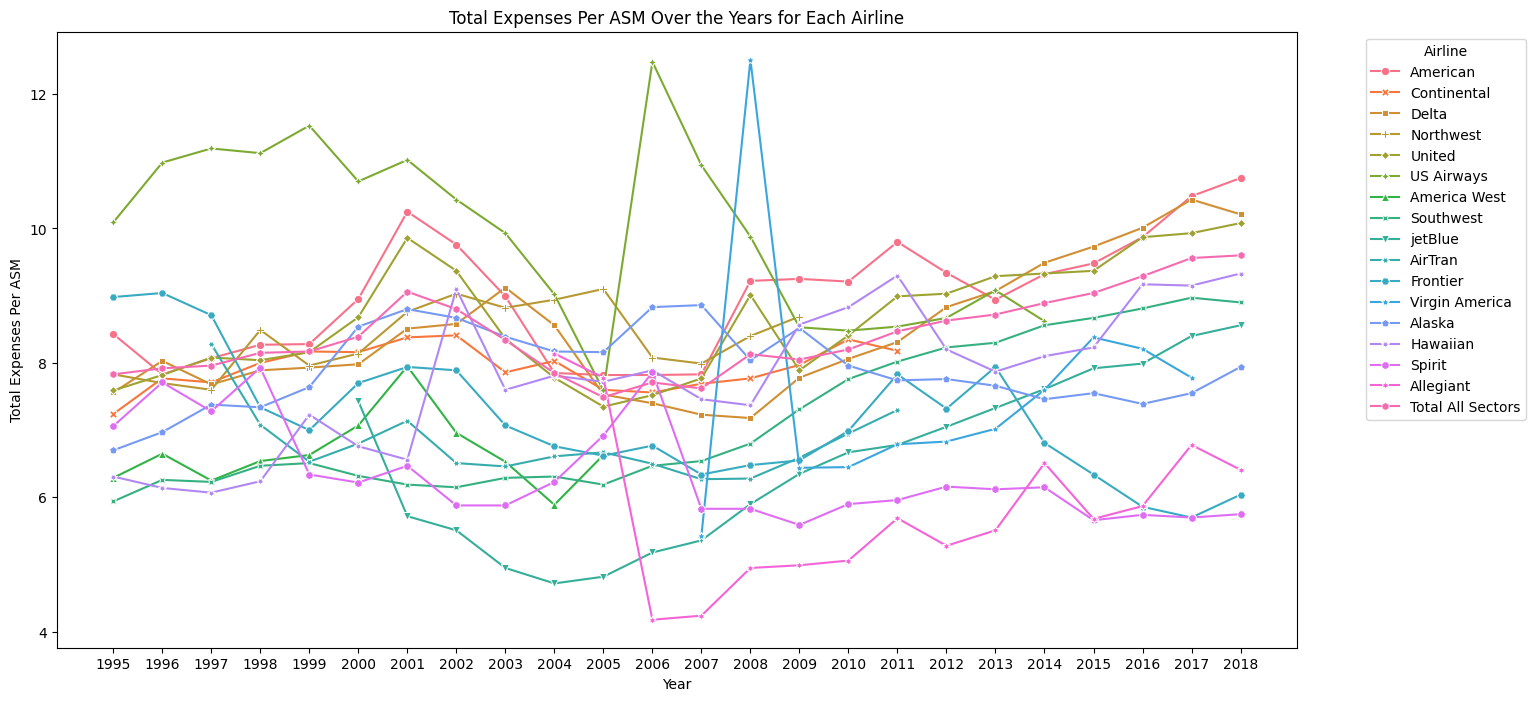

In [17]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

expenses = pd.read_csv('System Total Expenses Per ASM.csv')
df_transposed = expenses.set_index('Unnamed: 0').transpose()
df_transposed = df_transposed.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_transposed, markers=True, dashes=False)
plt.title('Total Expenses Per ASM Over the Years for Each Airline')
plt.xlabel('Year')
plt.ylabel('Total Expenses Per ASM')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Airline')
plt.show()

This lineplot lets us see the trends of each airline's total expenses per ASM from 1995-2018.

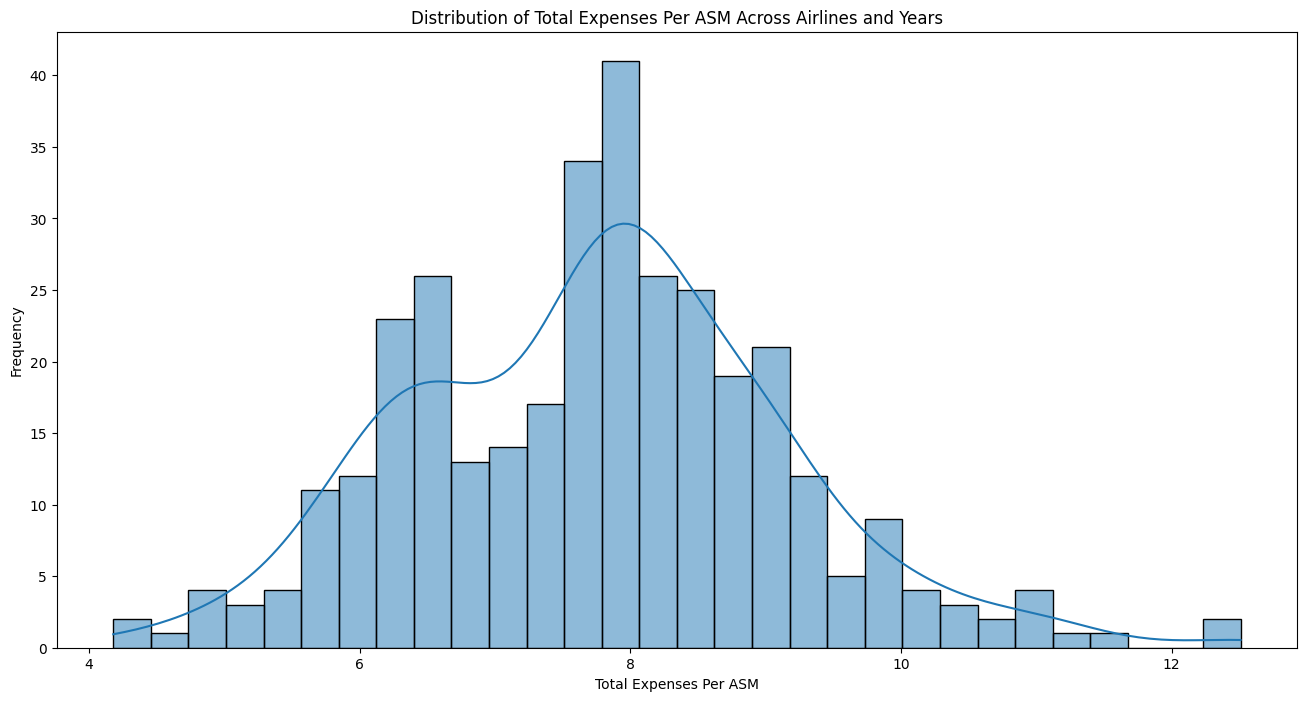

In [18]:
plt.figure(figsize=(16, 8))
sns.histplot(df_transposed.values.flatten(), bins=30, kde=True)
plt.title('Distribution of Total Expenses Per ASM Across Airlines and Years')
plt.xlabel('Total Expenses Per ASM')
plt.ylabel('Frequency')
plt.show()

This allows us to see that data is centered around 8, with a few small outliers near 4-5 and one large outlier at 12+. These outliers will be important to identify in order to correlate with our delay data, so we will look to find which airlines these are.

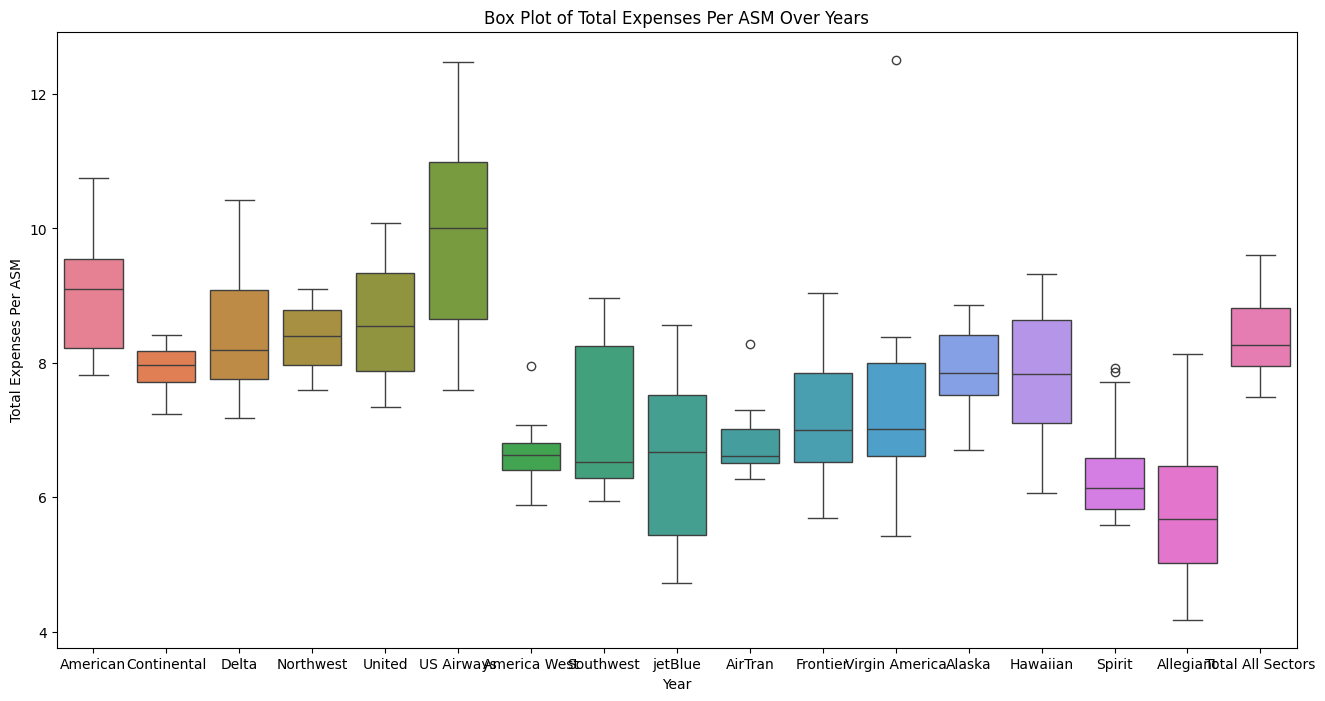

In [25]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_transposed)
plt.title('Box Plot of Total Expenses Per ASM Over Years')
plt.xlabel('Year')
plt.ylabel('Total Expenses Per ASM')
plt.show()

Here we can see the outliers, such as American, Delta, and US Airways tending to have more expenses per ASM, while jetBlue, Spirit, and Allegiant tend to be on the lower side.

Now let's take a look at the Total Revenue dataset to gain some more insights into the financial investments of different airlines between 1995 to 2015. 

In [26]:
data_revenue = pd.read_csv('System Total Revenue per ASM.csv')

In [27]:
data_revenue.describe

<bound method NDFrame.describe of            Unnamed: 0     1995     1996     1997     1998     1999     2000  \
0            American    9.10     9.47     9.82     9.98     9.51    10.72    
1         Continental    8.48     9.37     9.66     9.50     9.25    10.13    
2               Delta    9.29     9.50     9.80     9.89     9.73    10.04    
3           Northwest    9.87    10.10     9.96     9.08     9.54    10.23    
4              United    8.82     9.36     9.60     9.44     9.45    10.18    
5          US Airways   11.19    12.39    12.72    12.91    12.05    11.83    
6        America West    7.82     7.88     7.79     7.92     8.09     8.27    
7           Southwest    7.77     8.30     8.51     8.72     8.93     9.41    
8             jetBlue     -        -        -        -        -       7.63    
9             AirTran     -        -       7.39     8.02     9.01    10.55    
10           Frontier    7.76     8.33     7.54     8.79     9.03    11.11    
11     Virgin Amer

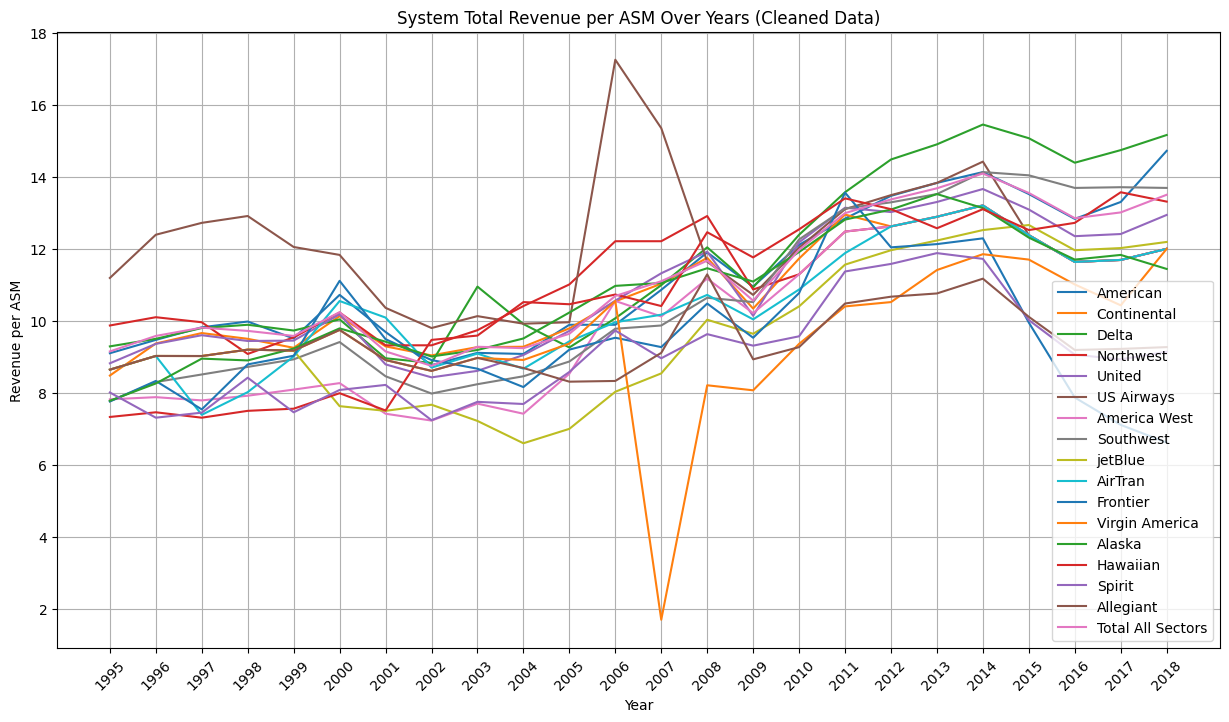

In [28]:
# Cleaning the data.
data_revenue = data_revenue.set_index('Unnamed: 0')
data_revenue.drop(columns=data_revenue.columns[-1], inplace=True)
data_revenue = data_revenue.apply(pd.to_numeric, errors='coerce')

# Dropping "all - NaN columns"
data_revenue.dropna(axis=1, how='all', inplace=True)

# Dropping "all - NaN rows"
data_revenue.dropna(axis=0, how='all', inplace=True)

# Filling any remaining NaN values with the mean of their respective column (year)
data_revenue = data_revenue.apply(lambda x: x.fillna(x.mean()), axis=0)

# Convert the years into strings
data_revenue.columns = data_revenue.columns.astype(str)

# Line Plot visualisation. 
plt.figure(figsize=(15, 8))
for airline in data_revenue.index:
    plt.plot(data_revenue.columns, data_revenue.loc[airline], label=airline)

plt.title('System Total Revenue per ASM Over Years (Cleaned Data)')
plt.xlabel('Year')
plt.ylabel('Revenue per ASM')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Based on the analysis of the revenue per Available Seat Mile (ASM) data for major US airlines, there is a general increasing trend in revenue over the years. This suggests that airlines have been progressively generating more revenue per seat per mile. While this directly reflects operational investment, its correlation with flight delays requires further data, particularly on delay frequencies and durations. In the context of the research question, higher revenue per ASM might imply better operational quality, potentially influencing delay patterns. However, without delay data, it's unclear whether this financial metric correlates with flight punctuality or quality as perceived by travelers.

# Ethics & Privacy

During the initial stages of our project, our primary dataset in consideration is from the U.S. Bureau of Transportation which contains a comprehensive log of all domestic flights delays  in the US since 2018. It includes information about different types of delays including weather, security, system delay, etc. Possible ethical concerns related that could be:

1. Bias and Representation: The dataset, while extensive, may not fully capture all the reasons for flight delays, specifically for  smaller airlines or less-traveled routes. There's potential for over-representation of dominant airline concerns or under-representation of issues faced by minority or economically disadvantaged groups who might be affected differently by such delays.
2. Data Privacy and Sensitivity: While the dataset might not include individual passenger details, the granular break-up of delay causes could be sensitive. For instance, consistent security delays at a particular airport might raise unwarranted concerns among passengers, even if these were minor or non-threatening issues. Other potential security concerns might arise as we along with the project. 
3. Methodological Ethics: Underlying reasons for potential conclusions from preliminary data analysis might be ignored.  For instance, system delays could be a technological glitch, understaffing, or other factors. Misinterpreting or oversimplifying such causes could lead to skewed or non-directive analysis. 
4. Financial Data Interpretation: Adding financial revenue data raises ethical concerns about how this information is interpreted. Misinterpretation could lead to unfair assumptions about an airline's service quality or operational efficiency. High revenue doesn't always mean better service, as it can be influenced by factors like route popularity or pricing strategies. It's important to analyze this data carefully to avoid misleading conclusions about the relationship between an airline's financial performance and flight delays.

In addition to this, other potential datasets that we could potentially use/merge would ideally contain information about Flight Times, Price Fare, Delay Duration, Arrival and Departure airport and specific airport information. There are potential ethical concerns attached to this too.. Firstly, the process of merging disparate datasets might lead to inconsistencies or biases, possibly skewing our findings. Furthermore, drawing inferred links between Price Fare and flight delays could inadvertently cast misperceptions about certain airlines' value propositions. On the privacy front, while individual identities aren't explicit, there's a subtle risk of indirectly identifying frequent travelers  through overlapped dataset details regarding frequently picked airlines to travel, frequent class to travel and whether its a cheap or an expensive one, etc. Finally, merging varied data can sometimes obfuscate the distinction between correlation and causation, leading to conclusions that might be misleading. As we progress, it's crucial that these ethical considerations remain at the forefront of our analytical work.

# Team Expectations 

* *Team Expectation 1:* Responding to our team's Discord group in a timely manner for quick communication throughout the quarter.
* *Team Expectation 2:* If any conflict arise with regard to project work, get input from other team members.
* *Team Expecation 3:* Spend an equal amount of time of work on each part of the project.
* *Team Expectation 4:* Each (or majority of) team member(s) should look over the final submission of each part to double check the work. 

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting and Discussion | |
|---|---|---|---|
| 11/8/2023  |  9 PM | Discuss what type of datasets we are looking for. Create a plan for how each of us will individually find a complementary set and the type of research question. |
| 11/14/2023 | 6:30 pm | Present each of our findings and select a final dataset to proceed with |
| 11/15/2023  |  9 PM |  Submit the data checkpoint. Implement data wrangling ideas and find potentially issues with our initial approach. | 
| 11/21/2023  | 9 PM  |  Discuss potentially ideas for exploratory data analysis and implement the first few. Spend the next week researching methods as well as previous works. |
| 11/28/2023 | 9 PM  | Adjust the dataset accordingly for systematic issues we find. Perform further exploratory data analysis to find other areas where adjustments are needed. Independently research inferential data analysis methods. |
| 12/04/2023  | 9 PM  | Perform final inferential data analysis after properly cleaning through data for any artefacts we previously detected |
| 12/08/2023  | 9 PM  | Confirm final results and draft up the documentation for the final project notebook |
| 12/10/2023  | 9 pm  | Record our final presentation |